<a href="https://colab.research.google.com/github/AlghaPorthos/AlghaPorthos/blob/main/CLIPSeg/Zero_shot_image_segmentation_with_CLIPSeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set-up environment

Let's first install 🤗 Transformers. We install from source as the model is brand new at the moment of writing.

In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 54.2 MB/s eta 0:00:00


## Load image

Next, let's load an image.

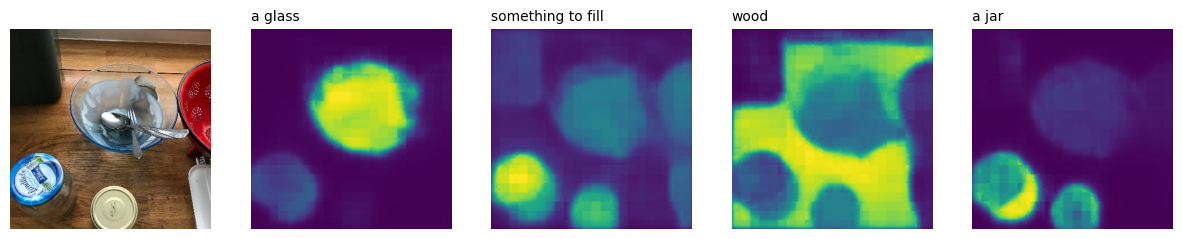

In [9]:
from PIL import Image
import requests

# url = "https://github.com/timojl/clipseg/blob/master/example_image.jpg?raw=true"
# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open("/content/image.png")
image
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

prompts = ["Parking space marking", "Car", "Building", "Road"]

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

import torch
import matplotlib.pyplot as plt

# predict
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];